# Actividad 2: Análisis de Datos Titanic

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

I

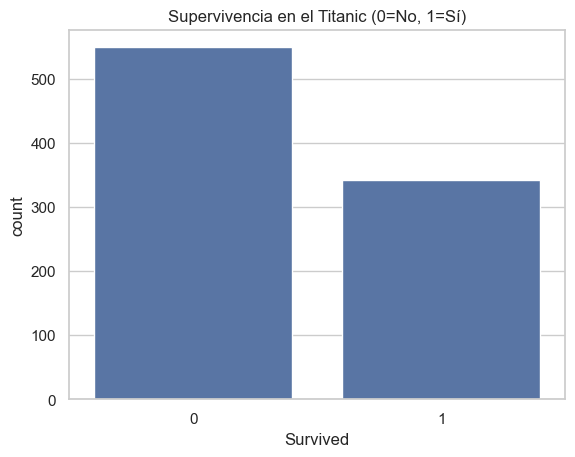

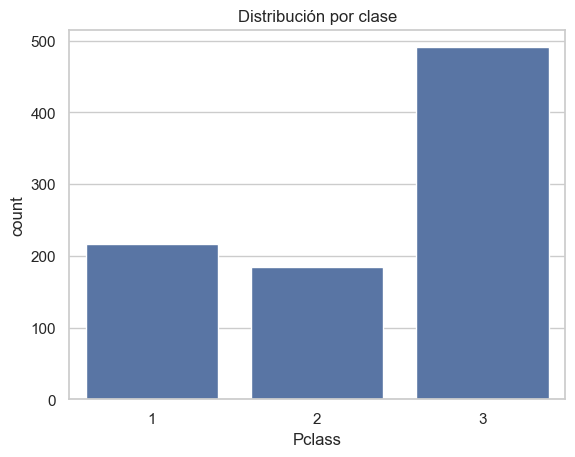

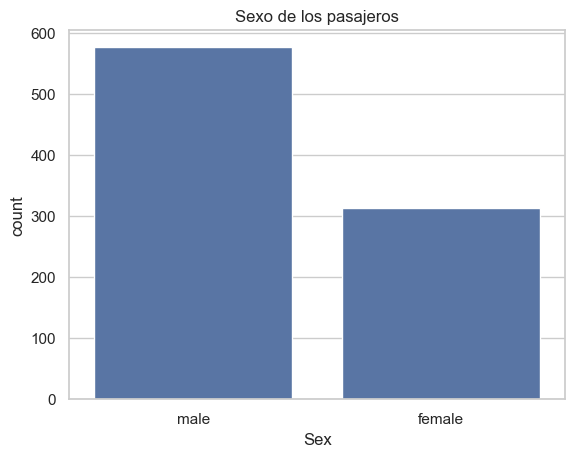


Media edad: 29.69911764705882
Moda edad: 24.0
Mediana edad: 28.0
Desviación estándar edad: 14.526497332334044

Tasa de supervivencia por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Tasa de supervivencia por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Pasajeros menores de 18 (primeras 5 filas):
                                    Name   Age     Sex  Pclass  Survived
7         Palsson, Master. Gosta Leonard   2.0    male       3         0
9    Nasser, Mrs. Nicholas (Adele Achem)  14.0  female       2         1
10       Sandstrom, Miss. Marguerite Rut   4.0  female       3         1
14  Vestrom, Miss. Hulda Amanda Adolfina  14.0  female       3         0
16                  Rice, Master. Eugene   2.0    male       3         0

Pasajeros con tarifas más altas:
                                   Name      Fare  Pclass  Survived
679  Cardeza, Mr. Thomas Drake Martinez  512.3292       1         1
258             

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# --- RUTA DEL ARCHIVO ---
file_path = "titanic.csv"
df = pd.read_csv(file_path)

# HEAD
print(df.head())

# INFO
print("\nInfo del DataFrame")
df.info()

# DESCRIBE
print("\nDF Describe")
print(df.describe())

# COLUMNAS
print("\nColumnas del DataFrame")
print(df.columns.tolist())

# Conteo de sobrevivientes
print("\nConteo de sobrevivientes (0 = No, 1 = Sí)")
print(df['Survived'].value_counts())

# Conteo por clase
print("\nConteo de pasajeros por clase")
print(df['Pclass'].value_counts().sort_index())

# Conteo por sexo
print("\nConteo de pasajeros por sexo")
print(df['Sex'].value_counts())

# Valores nulos
print("\nValores nulos por columna")
print(df.isnull().sum())

# Gráficas
sns.countplot(data=df, x='Survived')
plt.title("Supervivencia en el Titanic (0=No, 1=Sí)")
plt.show()

sns.countplot(data=df, x='Pclass')
plt.title("Distribución por clase")
plt.show()

sns.countplot(data=df, x='Sex')
plt.title("Sexo de los pasajeros")
plt.show()

# -------- Funciones --------
def tasa_supervivencia_por_clase(df):
    return df.groupby('Pclass')['Survived'].mean()

def tasa_supervivencia_por_sexo(df):
    return df.groupby('Sex')['Survived'].mean()

def pasajeros_menores(df, edad=18):
    return df[df['Age'] < edad][['Name', 'Age', 'Sex', 'Pclass', 'Survived']]

def top_tarifas(df, n=5):
    return df[['Name', 'Fare', 'Pclass', 'Survived']].sort_values(by='Fare', ascending=False).head(n)

def pasajeros_por_puerto(df, puerto):
    return df[df['Embarked'] == puerto][['Name', 'Sex', 'Pclass', 'Survived']]

# Estadísticos de Age
media = df['Age'].mean()
moda = df['Age'].mode()[0]
mediana = df['Age'].median()
desviacion = df['Age'].std()
print(f"\nMedia edad: {media}")
print(f"Moda edad: {moda}")
print(f"Mediana edad: {mediana}")
print(f"Desviación estándar edad: {desviacion}")

print("\nTasa de supervivencia por clase:")
print(tasa_supervivencia_por_clase(df))

print("\nTasa de supervivencia por sexo:")
print(tasa_supervivencia_por_sexo(df))

print("\nPasajeros menores de 18 (primeras 5 filas):")
print(pasajeros_menores(df, 18).head())

print("\nPasajeros con tarifas más altas:")
print(top_tarifas(df, 5))

print("\nPasajeros que embarcaron en Southampton:")
print(pasajeros_por_puerto(df, 'S').head())

## Conclusiones:


#### Aleli:
##### La desviación estándar alta nos indica que hay gran variabilidad en las edades, por lo que había tanto niños como adultos mayores a bordo. Analizando la tasa de supervivencia por sexo podemos identificar desigualdades de género en la supervivencia. Las mujeres tienen una tasa mucho más alta de supervivencia, esto nos dice que se priorizó su evacuación.

#### Morfín: 
##### Este proyecto muestra que, a través de técnicas de ciencia de datos y programación, es posible transformar datos desordenados en información clara y útil. El análisis del Titanic no solo permite identificar patrones de supervivencia, sino también aplicar modelos predictivos que fortalecen la comprensión de los datos. En conjunto, esta práctica ayuda a desarrollar competencias técnicas y analíticas

#### Charlie: 
##### We could visualise among the data that the prevalent class aboard was class 3, the most common gender is male and the gender that most survived the sinking of the titanic were women, while the mean age is 29.69 while the most common age is 24. We can also visualise that the class that mostly survived the tragedy was the class 1, demonstrating the hardships passengers had to go through to prevail in the icy waters.

#### Annie:
##### Los datos de la media y mediana de edad son bastante parecidos, esto indica que no hay muchos datos "outliers" que cambien drásticamente el promedio, por lo tanto es válido usar esta métrica en este caso. En cambio, la tasa de supervivencia por clase indica que el 62% de la clase alta sobrevivió, mientras solamente el 24% de los pasajeros de clase baja sobrevivieron, esto implica que en el momento de la inundación hubo una preferencia por el bienestar de las personas con mayor clase social que las de menor clase social. Uniendo estos datos, es correcto asumir que la mayoría de personas que sobrevivieron fueron de clase alta y entre las edades de 28 y 29.